<a href="https://colab.research.google.com/github/SilverStarStorm/Misc/blob/main/Project_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description

nonlinear partial differential equations:
1. $∂p/∂t = D_p Δ p + p^2 q + C –(K+1) p$
2. $∂q/∂t = D_q Δ q - p^2 q + K p$

Laplacian = Δ \\
positive diffusion coefficients: $D_p > 0$ *and* $D_q > 0$ \\
$C > 0$ \\
$K > 0$

---

coupled partial diff eq include functions: *p(x,y,t)* and *q(x,y,t)* \\
consider solutions on square of \\
$x∈[0, 40] × y∈[0, 40]$ \\

---

Neumann boundary conditions:
- p(x,y,0) = C + 0.1 for all (x,y) belonging to the square $10 < x < 30$ and $10 < y < 30$ \\
- q(x,y,0) = (K/C) + 0.2 for all (x,y) belonging to the square $10 < x < 30$ and $10 < y < 30$. \\

---

$D_p=1$ ; $D_q=8$ ; $C=4.5$ ; $K=9$

present contour plots of the solutions **p(x,y)** and **q(x,y)** at **t=2000** for \\
K = 7, 8, 9, 10, 11, 12

# Solution

### parameters

In [ ]:
D_p = 1.0
D_q = 8.0
C = 4.5
K = 9.0
Klist = [7, 8, 9, 10, 11, 12] # or represent it differently?

if D_p <= 0:
  raise ValueError("C must be greater than 0")
if D_q <= 0:
  raise ValueError("C must be greater than 0")
if C <= 0:
  raise ValueError("C must be greater than 0")
for k in Klist:
  if k <= 0:
    raise ValueError("K must be greater than 0")

### Solution

In [ ]:
import numpy as np

np.seterr(over='raise')

x_min, x_max = 0.0, 40.0
y_min, y_max = 0.0, 40.0
dx = dy = 1.0 # as suggested by the hints
dxdx = dx**2
dydy = dy**2

dt = 0.01

# Create the grid points
x = np.arange(x_min, x_max+dx, dx)
y = np.arange(y_min, y_max+dy, dy)


For the Laplacian, we can use the following second-order central difference approximation: \\
- Δf(x, y) ≈ (f(x+h, y) - 2f(x, y) + f(x-h, y)) / h² + (f(x, y+h) - 2f(x, y) + f(x, y-h)) / h² \\
Assuming f is always the same `as edge` outside of the area (no-flux Neumann boundary)

In [ ]:
def laplacian(f):
  laplacian_f = np.zeros(f.shape, dtype=np.float64)
  # interior
  laplacian_f[1:-1, 1:-1] = (f[2:, 1:-1] - 2*f[1:-1, 1:-1] + f[:-2, 1:-1]) / dxdx + (f[1:-1, 2:] - 2*f[1:-1, 1:-1] + f[1:-1, :-2]) / dydy
  # left boundary
  laplacian_f[0, 1:-1] = (f[1, 1:-1] - f[0, 1:-1]) / dxdx + (f[0, 2:] - 2*f[0, 1:-1] + f[0, :-2]) / dydy
  # rigth boundary
  laplacian_f[-1, 1:-1] = (f[-2, 1:-1] - f[-1, 1:-1]) / dxdx + (f[-1, 2:] - 2*f[-1, 1:-1] + f[-1, :-2]) / dydy
  # bottom boundary
  laplacian_f[1:-1, 0] = (f[2:, 0] - 2*f[1:-1, 0] + f[:-2, 0]) / dxdx + (f[1:-1, 1] - f[1:-1, 0]) / dydy
  # top boundary
  laplacian_f[1:-1, -1] = (f[2:, -1] - 2*f[1:-1, -1] + f[:-2, -1]) / dxdx + (f[1:-1, -2] - f[1:-1, -1]) / dydy
  # corners
  laplacian_f[0, 0] = (f[1, 0] - f[0, 0]) / dxdx + (f[0, 1] - f[0, 0]) / dydy
  laplacian_f[-1, 0] = (f[-2, 0] - f[-1, 0]) / dxdx + (f[-1, 1] - f[-1, 0]) / dydy
  laplacian_f[0, -1] = (f[1, -1] - f[0, -1]) / dxdx + (f[0, -2] - f[0, -1]) / dydy
  laplacian_f[-1, -1] = (f[-2, -1] - f[-1, -1]) / dxdx + (f[-1, -2] - f[-1, -1]) / dydy
  return laplacian_f

The boundary conditions give us the `'initial guess'`

for all (x,y) in square $10 < x < 30$ and $10 < y < 30$:
- p(x,y,0) = C + 0.1 \\
- q(x,y,0) = (K/C) + 0.2 \\

In [ ]:
def init(K):
  p = np.zeros((len(x), len(y)), dtype=np.float64)
  q = np.zeros((len(x), len(y)), dtype=np.float64)
  for i in range(len(x)):
    for j in range(len(y)):
      if 10 < x[i] < 30 and 10 < y[j] < 30:
        p[i, j] = C + 0.1
        q[i, j] = K/C + 0.2
  return p, q

In [ ]:
# solve using foward Euler
def forward_euler(K, tlimit, dt):
  p, q  = init(K)
  t = 0.0
  while t < tlimit:
    laplacian_p, laplacian_q = laplacian(p), laplacian(q)
    ppq = p * p * q
    p_next = p + dt * (D_p * laplacian_p + ppq + C - (K+1) * p)
    q_next = q + dt * (D_q * laplacian_q - ppq + K * p)
    p = p_next
    q = q_next
    t = t + dt
  return p, q

Initial matplotlib approach to contour plots.

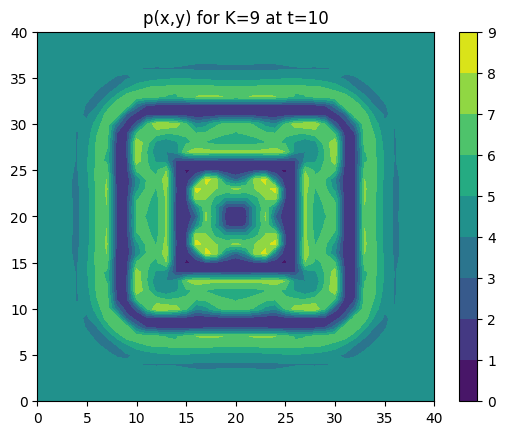

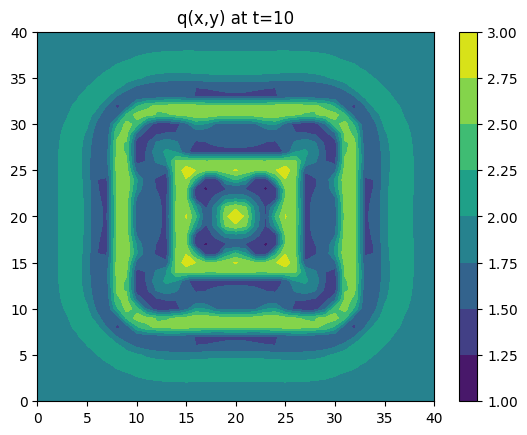

In [ ]:
import matplotlib.pyplot as plt

p, q = forward_euler(9.0, 5, dt)

# Plot the contour plots of p and q at t=2000
plt.contourf(x, y, p)
plt.colorbar()
plt.title(f'p(x,y) for K=9 at t=10')
plt.show()

plt.contourf(x, y, q)
plt.colorbar()
plt.title(f'q(x,y) at t=10')
plt.show()

In [ ]:
!pip install -U kaleido

Ultimately settled on using plotly to be able to include 3D visualizations.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.renderers.default = 'png'  # Use PNG for all charts in this session

def plot_solution(tlimit, dt, Ks):
  fig = make_subplots(
      rows=4, cols=len(Ks),
      specs=[[{"type": "contour"}] * len(Ks), [{"type": "surface"}] * len(Ks), [{"type": "contour"}] * len(Ks), [{"type": "surface"}] * len(Ks)],
      subplot_titles=[f'p(x,y) for K={k}' for k in Ks] + [f'p(x,y) for K={k}' for k in Ks] + [f'q(x,y) for K={k}' for k in Ks] + [f'q(x,y) for K={k}' for k in Ks],
      horizontal_spacing=0.05,
      vertical_spacing=0.05
  )
  for idx, k in enumerate(Ks):
    p, q = forward_euler(Ks[idx], tlimit, dt)
    fig.add_trace(go.Contour(z=p, x=x, y=y, colorscale='Viridis', showscale=False), row=1, col=idx + 1)
    fig.add_trace(go.Surface(z=p, x=x, y=y, colorscale='Viridis', showscale=False), row=2, col=idx + 1)
    fig.add_trace(go.Contour(z=q, x=x, y=y, colorscale='Viridis', showscale=False), row=3, col=idx + 1)
    fig.add_trace(go.Surface(z=q, x=x, y=y, colorscale='Viridis', showscale=False), row=4, col=idx + 1)
  fig.update_layout(title_text=f'Plots at t={tlimit}', height=240*4, width = 240*len(Ks)+100)
  fig.show()

In [ ]:
plot_solution(20, 0.01, [7, 8, 9, 10, 11, 12])

In [ ]:
plot_solution(200, 0.01, [7, 8, 9, 10, 11, 12])

In [ ]:
plot_solution(2000, 0.01, [7, 8, 9, 10, 11, 12])

In [ ]:
plot_solution(2000, 0.002, [7, 8, 9, 10, 11, 12])